K-Means clustering is an unsupervised machine learning algorithm that aims to partition N observations into K clusters in which each observation belongs to the cluster with the nearest mean. A cluster refers to a collection of data points aggregated together because of certain similarities. For image segmentation, clusters here are different image colors.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# read the image
image = cv2.imread("fruits.jpg")
# convert to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

We are going to use the cv2.kmeans() function, which takes a 2D array as input, and since our original image is 3D (width, height, and depth of 3 RGB values), we need to flatten the height and width into a single vector of pixels (3 RGB values):

In [6]:
# reshape the image to a 2D array of pixels and 3 color values (RGB)
pixel_values = image.reshape((-1, 3))
# convert to float
pixel_values = np.float32(pixel_values)
print(pixel_values.shape)

(458990, 3)


In [7]:
# define stopping criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

In [9]:
# number of clusters (K)
k = 3
_, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

In [10]:
# convert back to 8 bit values
centers = np.uint8(centers)

# flatten the labels array
labels = labels.flatten()

In [11]:
# convert all pixels to the color of the centroids
segmented_image = centers[labels.flatten()]

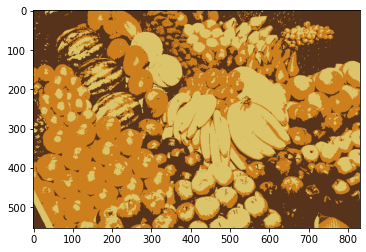

In [12]:
# reshape back to the original image dimension
segmented_image = segmented_image.reshape(image.shape)
# show the image
plt.imshow(segmented_image)
plt.show()

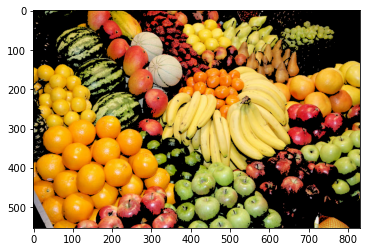

In [19]:
# disable only the cluster number 2 (turn the pixel into black)
masked_image = np.copy(image)
# convert to the shape of a vector of pixel values
masked_image = masked_image.reshape((-1, 3))
# color (i.e cluster) to disable
cluster = 2
masked_image[labels == cluster] = [0, 0, 0]
# convert back to original shape
masked_image = masked_image.reshape(image.shape)
# show the image
plt.imshow(masked_image)
plt.show()

# Refactoring_kmens

In [54]:
##Making Functions

import cv2
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
import glob

def read_image(file):
    """Read the image and convert it to RGB."""
    image = cv2.imread(r"file\fruits.jpg")
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [50]:
# path_read-directory preferable cell by cell 

# folder_path = 'file'

# file_names = os.listdir(folder_path)

# file_names = glob.glob(os.path.join(folder_path, '*.*'))  # This will fetch all files with any extension

#file_names = glob.glob(os.path.join(folder_path, '*.jpg'))

In [69]:
import cv2
import os

folder_path = r'C:\Users\SURUJ_KALITA\lr-in\pytorch\Assignment\file'  # Replace with the actual path to your folder containing image files

# Get a list of all file names in the folder
file_names = os.listdir(folder_path)

# Iterate through the list of file names and read each file using OpenCV
for file_name in file_names:
    file_path = os.path.join(folder_path, file_name)
    image = cv2.imread(file_path)
    if image is not None:
        # Process the image (e.g., display it, perform operations, etc.)
        cv2.imshow('Image', image)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
    else:
        print(f"Failed to read file: {file_name}")


In [64]:
def preprocess_image(image):
    """Reshape the image to a 2D array of pixels and 3 color values (RGB) and convert to float."""
    pixel_values = image.reshape((-1, 3))
    return np.float32(pixel_values)

In [65]:
def perform_kmeans_clustering(pixel_values, k=3):
    """Perform k-means clustering on the pixel values."""
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    compactness, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    return compactness, labels, np.uint8(centers)

def create_segmented_image(pixel_values, labels, centers):
    """Create a segmented image using the cluster centroids."""
    segmented_image = centers[labels.flatten()]
    return segmented_image.reshape(image.shape)

def create_masked_image(image, labels, cluster_to_disable):
    """Create a masked image by disabling a specific cluster."""
    masked_image = np.copy(image).reshape((-1, 3))
    masked_image[labels.flatten() == cluster_to_disable] = [0, 0, 0]
    return masked_image.reshape(image.shape)

In [66]:
def display_image(image):
    """Display the image using matplotlib."""
    plt.imshow(image)
    plt.show()

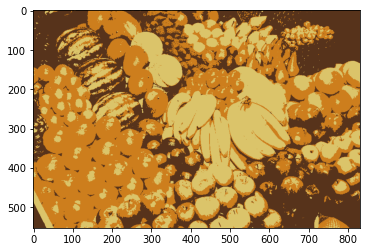

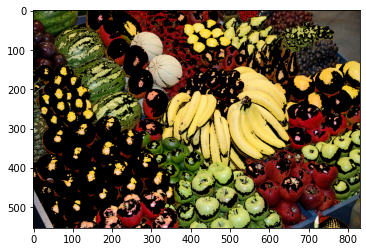

In [71]:
##Setting a K Value 2 already fixed above 
if __name__ == "__main__":
    image_path = sys.argv[1]
    #k = int(sys.argv[2])
    # read the image
    image = read_image(image_path)
    # preprocess the image
    pixel_values = preprocess_image(image)
    # compactness is the sum of squared distance from each point to their corresponding centers
    compactness, labels, centers = perform_kmeans_clustering(pixel_values, k)
    # create the segmented image
    segmented_image = create_segmented_image(pixel_values, labels, centers)
    # display the image
    display_image(segmented_image)
    # disable only the cluster number 2 (turn the pixel into black)
    cluster_to_disable = 2
    # create the masked image
    masked_image = create_masked_image(image, labels, cluster_to_disable)
    display_image(masked_image)

In [ ]:
--others-program-if-someone-wants-more-data-except-for Defining clustering and all kinds of data iso , lev etc .. 